<a href="https://colab.research.google.com/github/DeboraOliver/StockMarket_Analysis/blob/main/Machine_Learning_s%C3%A9ries_temporais(Arima_e_Facebook_Prophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries temporais em bases financeiras - ARIMA

## Instalação e importação das bibliotecas

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 23.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose #paconte de statitica para analise de series temporais
from pmdarima.arima import auto_arima

## Carregamento da base de dados

In [ ]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d') #converter a data para um formato de data
dataset = pd.read_csv('acoes.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'BOVA'])

In [ ]:
dataset

,BOVA
Date,
2015-01-02,47.259998
2015-01-05,46.320000
2015-01-06,46.580002
2015-01-07,48.150002
2015-01-08,48.509998
...,...
2020-10-27,95.800003
2020-10-28,92.430000
2020-10-29,92.910004


In [ ]:
time_series = dataset['BOVA']

In [ ]:
time_series

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 1446, dtype: float64

## Exploração da série temporal

In [ ]:
time_series[1]

46.31999969482422

In [ ]:
time_series['2015-01-08']

48.5099983215332

In [ ]:
time_series['2015-01-01':'2015-01-10']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
2015-01-09    47.529999
Name: BOVA, dtype: float64

In [ ]:
time_series[:'2015-07-31']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-07-27    47.349998
2015-07-28    48.180000
2015-07-29    48.740002
2015-07-30    48.430000
2015-07-31    49.369999
Name: BOVA, Length: 144, dtype: float64

In [ ]:
time_series['2015']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

In [ ]:
time_series.index.max()

Timestamp('2020-11-03 00:00:00')

In [ ]:
time_series.index.min()

Timestamp('2015-01-02 00:00:00')

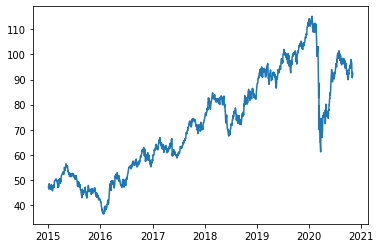

In [ ]:
plt.plot(time_series);

In [ ]:
figura = px.line(title='Histórico do preço das ações')
figura.add_scatter(x = time_series.index, y = time_series) #lembre o a data está no indice, assim a unica coluna já é o dado

In [ ]:
time_series_datas = time_series['2015-01-01':'2015-12-31'] 

In [ ]:
time_series_datas

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

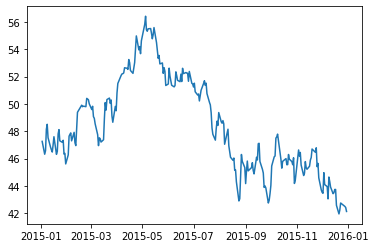

In [ ]:
plt.plot(time_series_datas); #gráfico estático simples

## Decomposição da série temporal

In [ ]:
type(time_series)

pandas.core.series.Series

In [ ]:
len(time_series) / 2 #total de registros

723.0

In [ ]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [ ]:
tendencia = decomposicao.trend #tendencia
sazonal = decomposicao.seasonal #efeito sazonal
aleatorio = decomposicao.resid #aleatorios ou residuais

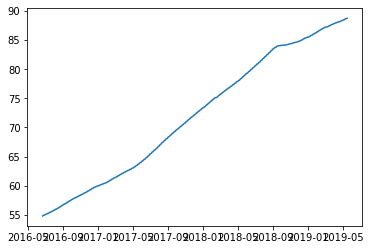

In [ ]:
plt.plot(tendencia);

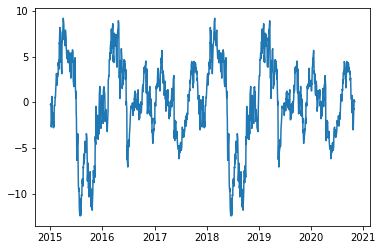

In [ ]:
plt.plot(sazonal); #considerando as variações sazonais

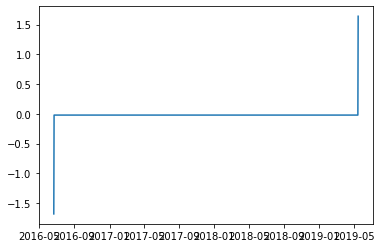

In [ ]:
plt.plot(aleatorio); #o que não é uma tendencia, mas também não é sazonal

## Previsões com ARIMA

Prevê o valor da ação num futuro

In [ ]:
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')
#isto faz as previsões
#o auto_arima evita que tenhamos que configurar os parametros manualmente

In [ ]:
# Parâmetros P, Q e D
modelo.order
#lista os parametros que foram descobertos

(4, 1, 4)

In [ ]:
previsoes = modelo.predict(n_periods=90) #quantos periodos para frente queremos fazer a previsão, neste caso 90 dias

In [ ]:
previsoes

array([92.05961137, 91.65627534, 91.68333334, 90.84374365, 91.05752378,
       90.25900856, 90.40264046, 89.99476079, 89.93179631, 89.99299278,
       89.76921756, 90.13446235, 89.90991202, 90.31546711, 90.23891949,
       90.48052553, 90.59539748, 90.61394471, 90.84571266, 90.71421528,
       90.93058645, 90.7755689 , 90.87005193, 90.78711402, 90.73338209,
       90.74420734, 90.59615679, 90.6591124 , 90.50732321, 90.56100757,
       90.47836883, 90.48451574, 90.49277051, 90.45402914, 90.52462914,
       90.473311  , 90.55434378, 90.52587665, 90.57462399, 90.58494844,
       90.58740466, 90.6267329 , 90.59692881, 90.63997056, 90.60460136,
       90.62783791, 90.6082762 , 90.6028863 , 90.60502858, 90.57901932,
       90.59446295, 90.56505341, 90.57996139, 90.56250519, 90.56717982,
       90.56746507, 90.56103058, 90.5744162 , 90.56317685, 90.57949148,
       90.57147315, 90.58169682, 90.58144289, 90.58214581, 90.58871895,
       90.5824063 , 90.59102162, 90.58320748, 90.58874924, 90.58

## Gráfico das previsões

vamos dividir o dataset em treinamento e teste

In [ ]:
len(time_series)

1446

In [ ]:
#vai do primeiro registro até o 1081
treinamento = time_series[:1081]
treinamento.shape

(1081,)

In [ ]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-05-10 00:00:00'))

In [ ]:
# vai do 1081 até o final
teste = time_series[1081:]
teste.shape

(365,)

In [ ]:
teste.index.min(), teste.index.max()

(Timestamp('2019-05-13 00:00:00'), Timestamp('2020-11-03 00:00:00'))

In [ ]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')
# vai treinar o modelo

In [ ]:
teste.index

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-03'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [ ]:
# criando um dataframe com essas previsões
previsoes = pd.DataFrame(modelo2.predict(n_periods=365), index=teste.index)
previsoes.columns = ['previsoes']
previsoes

,previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381
2019-05-15,91.040707
2019-05-16,91.095342
2019-05-17,91.144594
...,...
2020-10-27,105.575508
2020-10-28,105.616004
2020-10-29,105.656500


In [ ]:
teste

Date
2019-05-13    88.309998
2019-05-14    88.760002
2019-05-15    87.870003
2019-05-16    86.559998
2019-05-17    86.739998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 365, dtype: float64

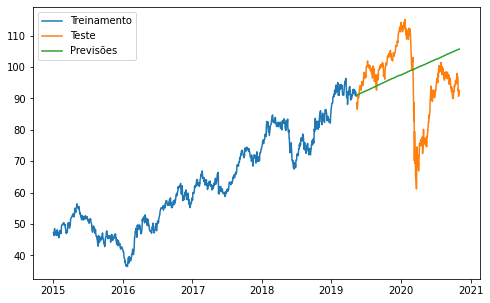

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

## Avaliação do ARIMA

O arima não é indicado para trabalhar com dados financeiros e sim com dados relacionados ao tempo, como por exemplo, vendas em tempos especificos. Já os dados financeiros dependem muito de fatores externos.

In [ ]:
teste[0:2]

Date
2019-05-13    88.309998
2019-05-14    88.760002
Name: BOVA, dtype: float64

In [ ]:
previsoes[0:2]

,previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381


In [ ]:
2.59 / 365

0.007095890410958904

In [ ]:
sum(abs(teste - previsoes['previsoes']) / len(teste))

10.260835836697574

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(teste, previsoes)
#quanto menor melhor

10.26083583669758

# Séries temporais em bases financeiras - Facebook Prophet

## Instalação e importação das bibliotecas

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
import pandas as pd

## Carregamento da base de dados

In [ ]:
dataset = pd.read_csv('acoes.csv', usecols=['Date', 'BOVA'])
dataset

,Date,BOVA
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


In [ ]:
dataset = dataset[['Date', 'BOVA']].rename(columns = {'Date': 'ds', 'BOVA': 'y'})
#isto é um padrão e obrigatorio a renomeação
dataset

,ds,y
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


## Construção do modelo e previsões

In [ ]:
modelo = Prophet() #classe principal
modelo.fit(dataset) #treinamento usamos a base de dados completa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo.make_future_dataframe(periods=90) #gera um novo dataframe com as previsões futuras (90 dias)
previsoes = modelo.predict(futuro)

In [ ]:
previsoes.head()
#additive_terms = regressão aditiva
#a previsão do preço da ação é o yhat (ultima coluna)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,48.719446,43.489449,57.462730,48.719446,48.719446,1.793430,1.793430,1.793430,0.352918,0.352918,0.352918,1.440512,1.440512,1.440512,0.0,0.0,0.0,50.512876
1,2015-01-05,48.756040,43.825988,57.928609,48.756040,48.756040,2.164614,2.164614,2.164614,0.293745,0.293745,0.293745,1.870869,1.870869,1.870869,0.0,0.0,0.0,50.920654
2,2015-01-06,48.768237,44.077747,58.368919,48.768237,48.768237,2.355469,2.355469,2.355469,0.342006,0.342006,0.342006,2.013463,2.013463,2.013463,0.0,0.0,0.0,51.123706
3,2015-01-07,48.780435,43.910595,58.112564,48.780435,48.780435,2.464291,2.464291,2.464291,0.311954,0.311954,0.311954,2.152337,2.152337,2.152337,0.0,0.0,0.0,51.244726
4,2015-01-08,48.792633,44.220972,58.207016,48.792633,48.792633,2.634891,2.634891,2.634891,0.349210,0.349210,0.349210,2.285681,2.285681,2.285681,0.0,0.0,0.0,51.427524


In [ ]:
len(dataset), len(previsoes)

(1446, 1536)

In [ ]:
len(previsoes) - len(dataset)

90

In [ ]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1446,2020-11-04,90.200446,85.007551,100.113412,90.200446,90.200446,2.285423,2.285423,2.285423,0.311954,0.311954,0.311954,1.973470,1.973470,1.973470,0.0,0.0,0.0,92.485869
1447,2020-11-05,90.178279,85.524713,99.784294,90.178279,90.178279,2.187431,2.187431,2.187431,0.349210,0.349210,0.349210,1.838222,1.838222,1.838222,0.0,0.0,0.0,92.365711
1448,2020-11-06,90.156113,84.826709,99.806555,90.156113,90.156113,2.059227,2.059227,2.059227,0.352918,0.352918,0.352918,1.706308,1.706308,1.706308,0.0,0.0,0.0,92.215340
1449,2020-11-07,90.133946,83.728478,98.398888,90.133946,90.133946,0.755115,0.755115,0.755115,-0.824916,-0.824916,-0.824916,1.580032,1.580032,1.580032,0.0,0.0,0.0,90.889062
1450,2020-11-08,90.111780,83.049157,97.595781,90.111780,90.111780,0.636591,0.636591,0.636591,-0.824916,-0.824916,-0.824916,1.461508,1.461508,1.461508,0.0,0.0,0.0,90.748371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021-01-28,88.316296,84.726137,99.564790,87.773443,89.055933,3.370994,3.370994,3.370994,0.349210,0.349210,0.349210,3.021785,3.021785,3.021785,0.0,0.0,0.0,91.687290
1532,2021-01-29,88.294129,84.645914,99.233949,87.744163,89.061206,3.374046,3.374046,3.374046,0.352918,0.352918,0.352918,3.021128,3.021128,3.021128,0.0,0.0,0.0,91.668175
1533,2021-01-30,88.271963,83.610455,97.472651,87.712126,89.055104,2.201643,2.201643,2.201643,-0.824916,-0.824916,-0.824916,3.026560,3.026560,3.026560,0.0,0.0,0.0,90.473606
1534,2021-01-31,88.249796,83.426064,97.930773,87.675719,89.047859,2.213913,2.213913,2.213913,-0.824916,-0.824916,-0.824916,3.038829,3.038829,3.038829,0.0,0.0,0.0,90.463709


## Gráfico das previsões

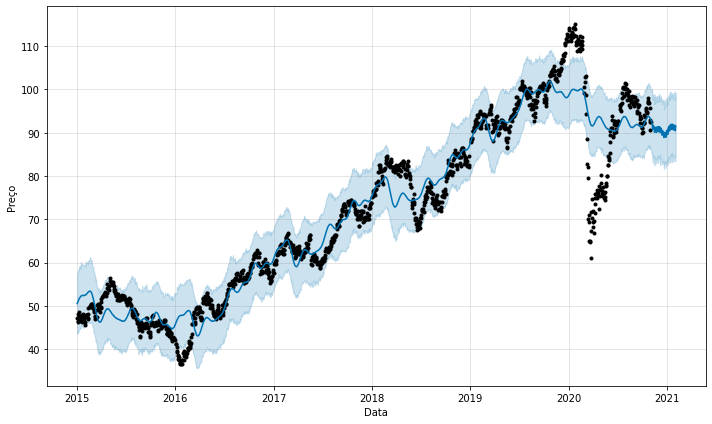

In [ ]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');
#a linha é a previsão
#os pontos é o valor real

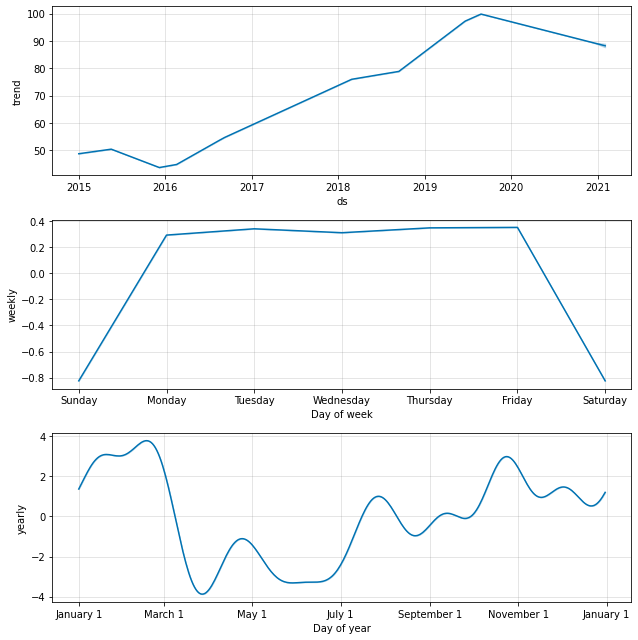

In [ ]:
modelo.plot_components(previsoes);

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
# para ter gráficos dinamicos

In [ ]:
plot_plotly(modelo, previsoes)

In [ ]:
plot_components_plotly(modelo, previsoes)

## Avaliação

In [ ]:
teste.shape

(365,)

In [ ]:
teste.tail()

Date
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, dtype: float64

In [ ]:
pred = modelo.make_future_dataframe(periods=0) #prever apenas os registros que já existem
previsoes = modelo.predict(pred)

In [ ]:
previsoes.shape

(1446, 19)

In [ ]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1441,2020-10-27,90.377778,86.920346,100.508299,90.377778,90.377778,3.220034,3.220034,3.220034,0.342006,0.342006,0.342006,2.878028,2.878028,2.878028,0.0,0.0,0.0,93.597812
1442,2020-10-28,90.355611,86.280886,100.492602,90.355611,90.355611,3.116426,3.116426,3.116426,0.311954,0.311954,0.311954,2.804472,2.804472,2.804472,0.0,0.0,0.0,93.472037
1443,2020-10-29,90.333445,86.284401,100.442992,90.333445,90.333445,3.064504,3.064504,3.064504,0.349210,0.349210,0.349210,2.715295,2.715295,2.715295,0.0,0.0,0.0,93.397949
1444,2020-10-30,90.311278,86.276156,100.708570,90.311278,90.311278,2.965348,2.965348,2.965348,0.352918,0.352918,0.352918,2.612429,2.612429,2.612429,0.0,0.0,0.0,93.276626
1445,2020-11-03,90.222612,85.528250,99.929529,90.222612,90.222612,2.451619,2.451619,2.451619,0.342006,0.342006,0.342006,2.109613,2.109613,2.109613,0.0,0.0,0.0,92.674231


In [ ]:
previsoes = previsoes['yhat'].tail(365)
#comparando o valor da previsão para os ultimos 365 registros

In [ ]:
previsoes

1081    92.373727
1082    92.394805
1083    92.343441
1084    92.365804
1085    92.361452
          ...    
1441    93.597812
1442    93.472037
1443    93.397949
1444    93.276626
1445    92.674231
Name: yhat, Length: 365, dtype: float64

In [ ]:
mean_absolute_error(teste, previsoes)

6.326610499101903

## Exercício

In [ ]:
dataset = pd.read_csv('acoes_ex.csv', usecols = ['Date', 'AMBEV'])
dataset = dataset[['Date', 'AMBEV']].rename(columns = {'Date': 'ds', 'AMBEV': 'y'})
dataset

,ds,y
0,2015-01-02,16.020000
1,2015-01-05,15.730000
2,2015-01-06,16.330000
3,2015-01-07,16.559999
4,2015-01-08,16.540001
...,...,...
1441,2020-10-27,13.720000
1442,2020-10-28,13.370000
1443,2020-10-29,12.890000
1444,2020-10-30,12.180000


In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
teste = dataset[1081:]
teste.shape

(365, 2)

In [ ]:
pred = model.make_future_dataframe(periods=0)
previsoes = model.predict(pred)

In [ ]:
previsoes = previsoes['yhat'].tail(365)

In [ ]:
previsoes

1081    17.681831
1082    17.669247
1083    17.624305
1084    17.619228
1085    17.610532
          ...    
1441    11.935979
1442    11.832276
1443    11.765738
1444    11.693192
1445    11.394376
Name: yhat, Length: 365, dtype: float64

In [ ]:
teste['y']

1081    17.010000
1082    16.940001
1083    16.610001
1084    16.639999
1085    16.490000
          ...    
1441    13.720000
1442    13.370000
1443    12.890000
1444    12.180000
1445    12.670000
Name: y, Length: 365, dtype: float64

In [ ]:
mean_absolute_error(teste['y'], previsoes)

1.029164439419817